# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **March 10th kl. 23:59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

<font color='red'>**!!! IMPORTANT: YOU ARE NOT ALLOWED TO USE LIBRARY FUNCTIONS (SCIPY, NUMPY etc.) UNLESS EXPLICITY MENTIONED !!!**
</font>

Good luck!

In [95]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn
#!conda install --yes --prefix {sys.prefix} pandas

In [96]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import seaborn as sns

RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wq = pd.read_csv("./data/winequality-red.csv", sep=';')
toy = wq[wq['quality'].isin([4, 8])].sample(n=20, random_state=RANDOM_SEED)

# Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (0, 0) and (1,1)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


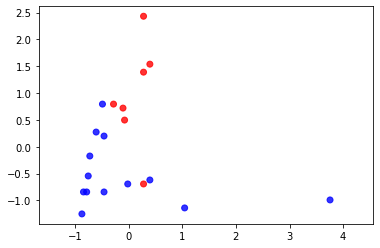

In [91]:
color_map = {4:'Blue', 8:'Red'}
X_kmeans = toy[["sulphates", "alcohol"]]

scaler = StandardScaler().fit(X_kmeans)
X_scaled = scaler.transform(X_kmeans)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=toy['quality'].map(color_map))
plt.axis('equal');

*******************
$\mu_1^0 = [0, 0]$ <br>
$\mu_2^0 = [1, 1]$
#### First iteration
$C_1, C_2 =\emptyset, \emptyset$ <br>
for $X$ in X_scaled: <br>
&emsp;   assigned_cluster = argmin(L2_norm($X, \mu_1^0$ ), L2_norm($X, \mu_2^0$ )) <br>
&emsp;   $C_{assignedcluster} = C_{assignedcluster} \cup X$ <br> 
&emsp; <font color="red"> example of a calculation for $[-0.75082858 -0.54497977]$: <br>
&emsp; &emsp; $dist\mu_1^0 = (|-0.75082858-0|^2 + |-0.54497977-0|^2) = 0.56374356 + 0.29700295 = 0.86074$ <br>
&emsp; &emsp; $dist\mu_2^0 = (|-0.75082858-1|^2 + |-0.54497977-1|^2) = 3.06540072 + 2.38696249 = 5.45236321 $ <br>
&emsp; &emsp; Thus, assigned_cluster = $argmin(0.86074, 5.45236321) = 1$, and the first point is assigned to the first cluster in the first iteration. <br>
&emsp; &emsp; Now, $C_1 = \emptyset \cup [-0.75082858 -0.54497977] = {[-0.75082858 -0.54497977]}$ </font> <br>
&emsp; By the end of this step, the clusters look like this: <br>
&emsp; &emsp; $C_1 = {[-0.75082858, -0.54497977], [-0.456386  ,  0.19901992], [-0.01472213, -0.69377971],[-0.456386  , -0.84257965], [-0.83916135, -0.84257965],[-0.60360729,  0.27341989], [-0.1030549,  0.7198197], [0.27972045, -0.69377971], [-0.72138432, -0.17297993], [0.39749748,-0.61937974], [-0.78027283, -0.84257965], [-0.48583026,  0.79421967], [-0.07361064, 0.49661979], [-0.27972045,0.79421967], [1.04527116, -1.14017952], [-0.86860561, -1.25177947]}$ <br> <br>
&emsp;&emsp; $C_2 =  {[0.27972045, 1.38941942], [0.27972045, 2.43101898], [3.75414288, -0.99137958],[0.39749748, 1.53821935]} $ <br>
&emsp;The next step is calculating the new centroids: <br>
&emsp; $\mu_1^1 = \frac{1}{|C_1|} \sum_{x_j \in C_1} x_j $ <br>
&emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j $ <br>
&emsp; <font color="red"> example of a calculation for $C_2$: <br>
&emsp; &emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j = $<br> &emsp; &emsp; $ = \frac{1}{4}([0.27972045, 1.38941942] + [0.27972045, 2.43101898]+ [3.75414288, -0.99137958] + [0.39749748, 1.53821935])=$<br> &emsp; &emsp; $ = \frac{1}{4}[4.71108126, 4.36727817]= $<br> &emsp; &emsp; $ = [1.17777032 ,1.09181954]$ <br>
</font> <br>
&emsp; By the end of this step, the centroids are $\mu_1^1 =[-0.29444258, -0.27295489]$ and$\mu_2^1 =  [1.17777032 ,1.09181954]$<br>. 

#### Second iteration
$C_1, C_2 =\emptyset, \emptyset$ <br>
for $X$ in X_scaled: <br>
&emsp;   assigned_cluster = argmin(L2_norm($X, \mu_1^1$ ), L2_norm($X, \mu_2^1$ )) <br>
&emsp;   $C_{assignedcluster} = C_{assignedcluster} \cup X$ <br> 
&emsp; <font color="red"> example of a calculation for $[-0.75082858 -0.54497977]$: <br>
&emsp; &emsp; $dist\mu_1^0 = (|-0.75082858-(-0.29444258)|^2 + |-0.54497977-(-0.27295489)|^2) = 0.20828818 + 0.07400079 =0.28228897 $ <br>
&emsp; &emsp; $dist\mu_2^0 = (|-0.75082858-1.17777032|^2 + |-0.54497977-1.09181954|^2) = 3.71949372 + 2.67911198 = 6.3986057  $ <br>
&emsp; &emsp; Thus, assigned_cluster = $argmin(0.28228897, 6.3986057) = 1$, and the first point is assigned to the first cluster in the first iteration. <br>
&emsp; &emsp; Now, $C_1 = \emptyset \cup [-0.75082858 -0.54497977] = {[-0.75082858 -0.54497977]}$ </font> <br>
&emsp; By the end of this step, the clusters look like this: <br>
&emsp; &emsp; $C_1 = {[-0.75082858, -0.54497977],[-0.456386  ,  0.19901992], [-0.01472213, -0.69377971], [-0.456386, -0.84257965],[-0.83916135, -0.84257965],[-0.60360729,  0.27341989],[-0.1030549,  0.7198197],[ 0.27972045, -0.69377971],[-0.72138432, -0.17297993],[0.39749748, -0.61937974],[-0.78027283, -0.84257965],[-0.48583026,  0.79421967],[-0.07361064,  0.49661979],[-0.27972045,  0.79421967],[1.04527116, -1.14017952],[-0.86860561, -1.25177947]}$ <br> <br>
&emsp;&emsp; $C_2 =  {[0.27972045, 1.38941942],[0.27972045, 2.43101898],[3.75414288, -0.99137958],[0.39749748, 1.53821935]} $ <br>
&emsp;The next step is calculating the new centroids: <br>
&emsp; $\mu_1^2 = \frac{1}{|C_1|} \sum_{x_j \in C_1} x_j $ <br>
&emsp; $\mu_2^2 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j $ <br>
&emsp; <font color="red"> example of a calculation for $C_2$: <br>
&emsp; &emsp; $\mu_2^2 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j = $<br> &emsp; &emsp; $ = \frac{1}{4}([0.27972045, 1.38941942] + [0.27972045, 2.43101898]+ [3.75414288, -0.99137958] + [0.39749748, 1.53821935])=$<br> &emsp; &emsp; $ = \frac{1}{4}[4.71108126, 4.36727817]= $<br> &emsp; &emsp; $ = [1.17777032 ,1.09181954]$ <br>
</font> <br>
&emsp; By the end of this step, the centroids are $\mu_1^2 =[-0.29444258, -0.27295489]$ and$\mu_2^2 =  [1.17777032 ,1.09181954]$<br>. 

This means the centroids have not changed at all between two iterations, signing a convergence and the end of this run of the k-means algorithm. 
*******************

### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************
#### Example 1
To make the calculations faster, the numbers used in them were rounded now to 3 decimals. <br>
$\mu_1^0 = [0, 0]$ <br>
$\mu_2^0 = [0, 2]$

##### First iteration
$C_1, C_2 =\emptyset, \emptyset$ <br>
for $X$ in X_scaled: <br>
&emsp;   assigned_cluster = argmin(L2_norm($X, \mu_1^0$ ), L2_norm($X, \mu_2^0$ )) <br>
&emsp;   $C_{assignedcluster} = C_{assignedcluster} \cup X$ <br> 
&emsp; <font color="red"> example of a calculation for $[-0.751, -0.545]$: <br>
&emsp; &emsp; $dist\mu_1^0 = (|-0.751-0|^2 + |-0.545-0|^2) = 0.564 + 0.297 = 0.861$ <br>
&emsp; &emsp; $dist\mu_2^0 = (|-0.751-0|^2 + |-0.545-2|^2) = 0.564 + 6.477 = 7.041 $ <br>
&emsp; &emsp; Thus, assigned_cluster = $argmin(0.861, 7.041) = 1$, and the first point is assigned to the first cluster in the first iteration. <br>
&emsp; &emsp; Now, $C_1 = \emptyset \cup [-0.751, -0.545] = \{[-0.751, -0.545]\}$ </font> <br>
&emsp; By the end of this step, the clusters look like this: <br>
&emsp; &emsp; $C_1 = \{[-0.751, -0.545],[-0.456,  0.199],[-0.015, -0.694],[-0.456, -0.843],[-0.839, -0.843],[-0.604,  0.273], [-0.103,  0.72 ],[ 0.280 , -0.694],[-0.721, -0.173],[ 3.754, -0.991],[0.397 -0.619],[-0.780 , -0.843],[-0.486,  0.794], [-0.074,  0.497],[-0.28 ,  0.794],[1.045, -1.14],[-0.869, -1.252]\}$ <br> <br>
&emsp;&emsp; $C_2 =  \{[0.28 , 1.389],[0.28 , 2.431],[0.397, 1.538]\} $ <br>
&emsp;The next step is calculating the new centroids: <br>
&emsp; $\mu_1^1 = \frac{1}{|C_1|} \sum_{x_j \in C_1} x_j $ <br>
&emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j $ <br>
&emsp; <font color="red"> example of a calculation for $C_2$: <br>
&emsp; &emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j = $<br> &emsp; &emsp; $ = \frac{1}{3}([0.28 , 1.389]+[0.28 , 2.431]+[0.397, 1.538])=$<br> &emsp; &emsp; $ = \frac{1}{3}[0.957, 5.358]= $<br> &emsp; &emsp; $ = [0.319 ,1.786]$ <br>
</font> <br>
&emsp; By the end of this step, the centroids are $\mu_1^1 =[-0.056 -0.315]$ and$\mu_2^1 =  [0.319 ,1.786]$<br>. 


##### Second iteration
$C_1, C_2 =\emptyset, \emptyset$ <br>
for $X$ in X_scaled: <br>
&emsp;   assigned_cluster = argmin(L2_norm($X, \mu_1^1$ ), L2_norm($X, \mu_2^1$ )) <br>
&emsp;   $C_{assignedcluster} = C_{assignedcluster} \cup X$ <br> 
&emsp; <font color="red"> example of a calculation for $[-0.751 -0.545]$: <br>
&emsp; &emsp; $dist\mu_1^0 = (|-0.751-(-0.056)|^2 + |-0.545-(-0.315)|^2) = 0.483 + 0.053 =0.536 $ <br>
&emsp; &emsp; $dist\mu_2^0 = (|-0.751-0.319|^2 + |-0.545-1.786|^2) = 1.145 + 5.434 = 6.579  $ <br>
&emsp; &emsp; Thus, assigned_cluster = $argmin(0.536, 6.579) = 1$, and the first point is assigned to the first cluster in the first iteration. <br>
&emsp; &emsp; Now, $C_1 = \emptyset \cup [-0.751, -0.545] = \{[-0.751, -0.545]\}$ </font> <br>
&emsp; By the end of this step, the clusters look like this: <br>
&emsp; &emsp; $C_1 = \{[-0.751, -0.545],[-0.456,  0.199],[-0.015, -0.694],[-0.456, -0.843],[-0.839, -0.843],[-0.604,  0.273], [-0.103,  0.72 ],[ 0.280 , -0.694],[-0.721, -0.173],[ 3.754, -0.991],[0.397 -0.619],[-0.780 , -0.843],[-0.486,  0.794], [-0.074,  0.497],[-0.28 ,  0.794],[1.045, -1.14],[-0.869, -1.252]\}$ <br> <br>
&emsp;&emsp; $C_2 =  \{[0.28 , 1.389],[0.28 , 2.431],[0.397, 1.538]\} $ <br>
&emsp;The next step is calculating the new centroids: <br>
&emsp; $\mu_1^1 = \frac{1}{|C_1|} \sum_{x_j \in C_1} x_j $ <br>
&emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j $ <br>
&emsp; <font color="red"> example of a calculation for $C_2$: <br>
&emsp; &emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j = $<br> &emsp; &emsp; $ = \frac{1}{3}([0.28 , 1.389]+[0.28 , 2.431]+[0.397, 1.538])=$<br> &emsp; &emsp; $ = \frac{1}{3}[0.957, 5.358]= $<br> &emsp; &emsp; $ = [0.319 ,1.786]$ <br>
</font> <br>
&emsp; By the end of this step, the centroids are $\mu_1^1 =[-0.056 -0.315]$ and$\mu_2^1 =  [0.319 ,1.786]$<br>. 


This means the centroids have not changed at all between two iterations, signing a convergence and the end of this run of the k-means algorithm. 
*******************


#### Example 2
$\mu_1^0 = [0, 0]$ <br>
$\mu_2^0 = [2, 2]$


##### First iteration
$C_1, C_2 =\emptyset, \emptyset$ <br>
for $X$ in X_scaled: <br>
&emsp;   assigned_cluster = argmin(L2_norm($X, \mu_1^0$ ), L2_norm($X, \mu_2^0$ )) <br>
&emsp;   $C_{assignedcluster} = C_{assignedcluster} \cup X$ <br> 
&emsp; <font color="red"> example of a calculation for $[-0.751, -0.545]$: <br>
&emsp; &emsp; $dist\mu_1^0 = (|-0.751-0|^2 + |-0.545-0|^2) = 0.564 + 0.297 = 0.861$ <br>
&emsp; &emsp; $dist\mu_2^0 = (|-0.751-2|^2 + |-0.545-2|^2) = 7.568 + 6.477 = 14.045 $ <br>
&emsp; &emsp; Thus, assigned_cluster = $argmin(0.861, 14.045) = 1$, and the first point is assigned to the first cluster in the first iteration. <br>
&emsp; &emsp; Now, $C_1 = \emptyset \cup [-0.751, -0.545] = \{[-0.751, -0.545]\}$ </font> <br>
&emsp; By the end of this step, the clusters look like this: <br>
&emsp; &emsp; $C_1 = \{[-0.751, -0.545],[-0.456,  0.199],[-0.015, -0.694],[-0.456, -0.843],[-0.839, -0.843],[-0.604,  0.273], [-0.103,  0.72 ],[ 0.280 , -0.694],[-0.721, -0.173],[ 3.754, -0.991],[0.397 -0.619],[-0.780 , -0.843],[-0.486,  0.794], [-0.074,  0.497],[-0.28 ,  0.794],[1.045, -1.14],[-0.869, -1.252]\}$ <br> <br>
&emsp;&emsp; $C_2 =  \{[0.28 , 2.431],[ 3.754, -0.991]\} $ <br>
&emsp;The next step is calculating the new centroids: <br>
&emsp; $\mu_1^1 = \frac{1}{|C_1|} \sum_{x_j \in C_1} x_j $ <br>
&emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j $ <br>
&emsp; <font color="red"> example of a calculation for $C_2$: <br>
&emsp; &emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j = $<br> &emsp; &emsp; $ = \frac{1}{2}([0.28 , 2.431]+[3.754 , -0.991])=$<br> &emsp; &emsp; $ = \frac{1}{2}[4.034, 1.44]= $<br> &emsp; &emsp; $ = [2.017 ,0.72]$ <br>
</font> <br>
&emsp; By the end of this step, the centroids are $\mu_1^1 =[-0.224 -0.08]$ and$\mu_2^1 =  [2.017 ,0.72]$<br>. 

##### Second iteration
$C_1, C_2 =\emptyset, \emptyset$ <br>
for $X$ in X_scaled: <br>
&emsp;   assigned_cluster = argmin(L2_norm($X, \mu_1^1$ ), L2_norm($X, \mu_2^1$ )) <br>
&emsp;   $C_{assignedcluster} = C_{assignedcluster} \cup X$ <br> 
&emsp; <font color="red"> example of a calculation for $[-0.751 -0.545]$: <br>
&emsp; &emsp; $dist\mu_1^0 = (|-0.751-(-0.224)|^2 + |-0.545-(-0.08)|^2) = 0.278 + 0.216 =0.494 $ <br>
&emsp; &emsp; $dist\mu_2^0 = (|-0.751-2.017|^2 + |-0.545-0.72|^2) = 7.662 + 1.6 = 9.262  $ <br>
&emsp; &emsp; Thus, assigned_cluster = $argmin(0.494, 9.262) = 1$, and the first point is assigned to the first cluster in the first iteration. <br>
&emsp; &emsp; Now, $C_1 = \emptyset \cup [-0.751 -0.545] = \{[-0.751 -0.545]\}$ </font> <br>
&emsp; By the end of this step, the clusters look like this: <br>
&emsp; &emsp; $C_1 = \{[-0.751, -0.545],[-0.456,  0.199],[-0.015, -0.694],[-0.456, -0.843],[-0.839, -0.843],[-0.604,  0.273], [-0.103,  0.72 ],[ 0.280 , -0.694],[-0.721, -0.173],[ 3.754, -0.991],[0.397 -0.619],[-0.780 , -0.843],[-0.486,  0.794], [-0.074,  0.497],[-0.28 ,  0.794],[1.045, -1.14],[-0.869, -1.252]\}$ <br> <br>
&emsp;&emsp; $C_2 =  \{[0.28 , 2.431],[ 3.754, -0.991]\} $ <br>
&emsp;The next step is calculating the new centroids: <br>
&emsp; $\mu_1^1 = \frac{1}{|C_1|} \sum_{x_j \in C_1} x_j $ <br>
&emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j $ <br>
&emsp; <font color="red"> example of a calculation for $C_2$: <br>
&emsp; &emsp; $\mu_2^1 = \frac{1}{|C_2|} \sum_{x_j \in C_2} x_j = $<br> &emsp; &emsp; $ = \frac{1}{2}([0.28 , 2.431]+[3.754 , -0.991])=$<br> &emsp; &emsp; $ = \frac{1}{2}[4.034, 1.44]= $<br> &emsp; &emsp; $ = [2.017 ,0.72]$ <br>
</font> <br>
&emsp; By the end of this step, the centroids are $\mu_1^1 =[-0.224 -0.08]$ and$\mu_2^1 =  [2.017 ,0.72]$<br>.

This means the centroids have not changed at all between two iterations, signing a convergence and the end of this run of the k-means algorithm. 
******************

<span style='color: green'>**\[Motivate\]**</span> <br>
B) How you explain the difference between the two cluster assignments in point A)?

*******************
The results and runtime of k-means are very dependent on the initial partition of the run. It is often encountered that the run terminates at a local optimum. In this case, the initilizations, although not terribly different showcase how different the results can be, and how choosing the initial centroids can be extremely important. 
******************

### Task 1.1.3 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

For this task, for easier comprehension, I have renamed the points to be named after letters in the alphabet. <br>
Hence, 
$A=[-0.75082858, -0.54497977],
B=[-0.456386  ,  0.19901992],
C=[-0.01472213, -0.69377971],
D=       [-0.456386  , -0.84257965],
E=       [ 0.27972045,  1.38941942],
F=       [-0.83916135, -0.84257965],
G=      [ 0.27972045,  2.43101898],
H=       [-0.60360729,  0.27341989],
I=       [-0.1030549 ,  0.7198197 ],
J=       [ 0.27972045, -0.69377971],
K=       [-0.72138432, -0.17297993],
L=       [ 3.75414288, -0.99137958],
M=       [ 0.39749748, -0.61937974],
N=       [-0.78027283, -0.84257965],
O=       [-0.48583026,  0.79421967],
P=       [-0.07361064,  0.49661979],
Q=       [-0.27972045,  0.79421967],
R=       [ 0.39749748,  1.53821935],
S=       [ 1.04527116, -1.14017952],
T=       [-0.86860561, -1.25177947]$


*******************
$C_1 = \{A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P, Q, R,S,T \}$ <br>
******************

| $\delta$ |A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- | --- |--- | --- | --- |--- | --- | --- |
| A|0.0|0.8|0.751|0.419|2.192|0.311|3.15|0.831|1.421|1.042|0.373|4.527|1.15|0.299|1.365|1.243|1.419|2.378|1.892|0.717|
| B|0.8|0.0|0.996|1.042|1.399|1.11|2.35|0.165|0.629|1.157|0.457|4.375|1.182|1.091|0.596|0.484|0.62|1.588|2.011|1.509|
| C|0.751|0.996|0.0|0.465|2.104|0.837|3.139|1.132|1.417|0.295|0.877|3.781|0.419|0.779|1.561|1.192|1.511|2.27|1.15|1.02|
| D|0.419|1.042|0.465|0.0|2.35|0.383|3.356|1.126|1.602|0.751|0.721|4.213|0.882|0.324|1.637|1.393|1.646|2.529|1.53|0.581|
| E|2.192|1.399|2.104|2.35|0.0|2.497|1.042|1.424|0.771|2.083|1.855|4.211|2.011|2.471|0.97|0.96|0.817|0.189|2.642|2.88|
| F|0.311|1.11|0.837|0.383|2.497|0.0|3.46|1.14|1.728|1.129|0.68|4.595|1.256|0.059|1.675|1.543|1.73|2.683|1.907|0.41|
| G|3.15|2.35|3.139|3.356|1.042|3.46|0.0|2.332|1.753|3.125|2.79|4.876|3.052|3.441|1.807|1.966|1.73|0.901|3.652|3.858|
| H|0.831|0.165|1.132|1.126|1.424|1.14|2.332|0.0|0.671|1.31|0.461|4.538|1.341|1.13|0.534|0.575|0.614|1.613|2.172|1.548|
| I|1.421|0.629|1.417|1.602|0.771|1.728|1.753|0.671|0.0|1.465|1.086|4.219|1.429|1.703|0.39|0.225|0.192|0.959|2.186|2.116|
| J|1.042|1.157|0.295|0.751|2.083|1.129|3.125|1.31|1.465|0.0|1.128|3.487|0.139|1.07|1.674|1.242|1.59|2.235|0.886|1.277|
| K|0.373|0.457|0.877|0.721|1.855|0.68|2.79|0.461|1.086|1.128|0.0|4.549|1.204|0.673|0.995|0.931|1.063|2.044|2.013|1.089|
| L|4.527|4.375|3.781|4.213|4.211|4.595|4.876|4.538|4.219|3.487|4.549|0.0|3.378|4.536|4.6|4.107|4.411|4.203|2.713|4.63|
| M|1.15|1.182|0.419|0.882|2.011|1.256|3.052|1.341|1.429|0.139|1.204|3.378|0.0|1.198|1.666|1.211|1.567|2.157|0.831|1.415|
| N|0.299|1.091|0.779|0.324|2.471|0.059|3.441|1.13|1.703|1.07|0.673|4.536|1.198|0.0|1.663|1.515|1.712|2.656|1.849|0.419|
| O|1.365|0.596|1.561|1.637|0.97|1.675|1.807|0.534|0.39|1.674|0.995|4.6|1.666|1.663|0.0|0.508|0.206|1.155|2.467|2.082|
| P|1.243|0.484|1.192|1.393|0.96|1.543|1.966|0.575|0.225|1.242|0.931|4.107|1.211|1.515|0.508|0.0|0.361|1.143|1.983|1.921|
| Q|1.419|0.62|1.511|1.646|0.817|1.73|1.73|0.614|0.192|1.59|1.063|4.411|1.567|1.712|0.206|0.361|0.0|1.006|2.344|2.129|
| R|2.378|1.588|2.27|2.529|0.189|2.683|0.901|1.613|0.959|2.235|2.044|4.203|2.157|2.656|1.155|1.143|1.006|0.0|2.755|3.064|
| S|1.892|2.011|1.15|1.53|2.642|1.907|3.652|2.172|2.186|0.886|2.013|2.713|0.831|1.849|2.467|1.983|2.344|2.755|0.0|1.917|
| T|0.717|1.509|1.02|0.581|2.88|0.41|3.858|1.548|2.116|1.277|1.089|4.63|1.415|0.419|2.082|1.921|2.129|3.064|1.917|0.0|

By using common sense and the graphed points from earlier, we can conclude where the smallest distance might be. <br>
The smallest distance, $0.059$ is between $F$ and $N$.

$C_2 = \{A,B,C,D,E,G,H,I,J,K,L,M,O,P, Q, R,S,T, FN  \}$ <br>

After creating this, new distances from each point to the newly formed cluster must be calculated. In this case, we are using average link for that, with the formula $dist_{al}(C_i,C_j) = \frac{1}{|C_i||C_j|}\sum_{x \in C_i, y \in C_j}dist(x,y)$
Let's show how to do this for $FN$ and $A$.
$$dist_{al}(A,FN) = \frac{1}{1 \times 2}\sum_{x \in A, y \in FN}dist(x,y)$$
$$dist_{al}(A,FN) = \frac{1}{2}(dist(F,A)+ dist(N,A))$$
$$dist_{al}(A,FN) = \frac{1}{2}(0.31+ 0.299)$$
$$dist_{al}(A,FN) = \frac{1}{2}(0.609) = 0.3045$$

| $\delta$ |A|B|C|D|E|G|H|I|J|K|L|M|O|P|Q|R|S|T|FN
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- | --- |--- | --- | --- |--- | ---|
| A|0.0|0.8|0.751|0.419|2.192|3.15|0.831|1.421|1.042|0.373|4.527|1.15|1.365|1.243|1.419|2.378|1.892|0.717|0.305|
| B|0.8|0.0|0.996|1.042|1.399|2.35|0.165|0.629|1.157|0.457|4.375|1.182|0.596|0.484|0.62|1.588|2.011|1.509|1.101|
| C|0.751|0.996|0.0|0.465|2.104|3.139|1.132|1.417|0.295|0.877|3.781|0.419|1.561|1.192|1.511|2.27|1.15|1.02|0.808|
| D|0.419|1.042|0.465|0.0|2.35|3.356|1.126|1.602|0.751|0.721|4.213|0.882|1.637|1.393|1.646|2.529|1.53|0.581|0.354|
| E|2.192|1.399|2.104|2.35|0.0|1.042|1.424|0.771|2.083|1.855|4.211|2.011|0.97|0.96|0.817|0.189|2.642|2.88|2.484|
| G|3.15|2.35|3.139|3.356|1.042|0.0|2.332|1.753|3.125|2.79|4.876|3.052|1.807|1.966|1.73|0.901|3.652|3.858|3.451|
| H|0.831|0.165|1.132|1.126|1.424|2.332|0.0|0.671|1.31|0.461|4.538|1.341|0.534|0.575|0.614|1.613|2.172|1.548|1.135|
| I|1.421|0.629|1.417|1.602|0.771|1.753|0.671|0.0|1.465|1.086|4.219|1.429|0.39|0.225|0.192|0.959|2.186|2.116|1.715|
| J|1.042|1.157|0.295|0.751|2.083|3.125|1.31|1.465|0.0|1.128|3.487|0.139|1.674|1.242|1.59|2.235|0.886|1.277|1.1|
| K|0.373|0.457|0.877|0.721|1.855|2.79|0.461|1.086|1.128|0.0|4.549|1.204|0.995|0.931|1.063|2.044|2.013|1.089|0.676|
| L|4.527|4.375|3.781|4.213|4.211|4.876|4.538|4.219|3.487|4.549|0.0|3.378|4.6|4.107|4.411|4.203|2.713|4.63|4.566|
| M|1.15|1.182|0.419|0.882|2.011|3.052|1.341|1.429|0.139|1.204|3.378|0.0|1.666|1.211|1.567|2.157|0.831|1.415|1.227|
| O|1.365|0.596|1.561|1.637|0.97|1.807|0.534|0.39|1.674|0.995|4.6|1.666|0.0|0.508|0.206|1.155|2.467|2.082|1.669|
| P|1.243|0.484|1.192|1.393|0.96|1.966|0.575|0.225|1.242|0.931|4.107|1.211|0.508|0.0|0.361|1.143|1.983|1.921|1.529|
| Q|1.419|0.62|1.511|1.646|0.817|1.73|0.614|0.192|1.59|1.063|4.411|1.567|0.206|0.361|0.0|1.006|2.344|2.129|1.721|
| R|2.378|1.588|2.27|2.529|0.189|0.901|1.613|0.959|2.235|2.044|4.203|2.157|1.155|1.143|1.006|0.0|2.755|3.064|2.669|
| S|1.892|2.011|1.15|1.53|2.642|3.652|2.172|2.186|0.886|2.013|2.713|0.831|2.467|1.983|2.344|2.755|0.0|1.917|1.878|
| T|0.717|1.509|1.02|0.581|2.88|3.858|1.548|2.116|1.277|1.089|4.63|1.415|2.082|1.921|2.129|3.064|1.917|0.0|0.414|
| FN|0.305|1.101|0.808|0.354|2.484|3.451|1.135|1.715|1.1|0.676|4.566|1.227|1.669|1.529|1.721|2.669|1.878|0.414|0.0|

The next smallest distance is between $J$ and $M$, so we have to cluster them up. 

$C_3 = \{A,B,C,D,E,G,H,I,K,L,O,P, Q, R,S,T,FN,JM  \}$ <br>
A slight difference to the before shown algorithm occurs when calculating the distance to another cluster, e.g. $JM$:
$$dist_{al}(JM,FN) = \frac{1}{2 \times 2}\sum_{x \in JM, y \in FN}dist(x,y)$$
$$dist_{al}(JM,FN) = \frac{1}{4}(dist(J,F)+ dist(J,N) + dist(M, F) + dist(M,N)$$
$$dist_{al}(JM,FN) = \frac{1}{4}(1.129+ 1.07+1.256+1.198)$$
$$dist_{al}(JM,FN) = \frac{1}{4}(4.653) = 1.163$$

The new distances are:


| $\delta$ |A|B|C|D|E|G|H|I|K|L|O|P|Q|R|S|T|FN|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- | --- |--- | --- | --- |
| JM|1.096|1.17|0.357|0.816|2.047|3.089|1.325|1.447|1.166|3.432|1.67|1.227|1.578|2.196|0.858|1.346|1.163|

The next smallest distance is between $B$ and $H$, so we merge them. <br>
$C_4 = \{A,C,D,E,G,I,K,L,O,P, Q, R,S,T,FN,JM,BH  \}$ <br>

We go on the same way as before, merging...

$C_5 = \{A,C,D,G,I,K,L,O,P, Q,S,T,FN,JM,BH,ER  \}$ <br>
$C_6 = \{A,C,D,G,K,L,O,P,S,T,FN,JM,BH,ER,IQ  \}$ <br>
Our next smallest distance is a distance from $P$ to the newly formed cluster $IQ$, as the calculation of the distance after forming the new cluster is a bit different, let's show it for $IPQ$ and $A$. <br>
$C_7 = \{A,C,D,G,K,L,O,S,T,FN,JM,BH,ER,IPQ\}$ <br> 

$$dist_{al}(JM,IPQ) = \frac{1}{2 \times 3}\sum_{x \in JM, y \in IPQ}dist(x,y)$$
$$dist_{al}(JM,IPQ) = \frac{1}{6}(dist(I,J)+ dist(I,M)+ dist(Q,J)+dist(Q,M)+dist(P,J)dist(P,M))$$
$$dist_{al}(JM,IPQ) = \frac{1}{6}(1.465+1.429+1.59+1.567+1.242+1.211)$$
$$dist_{al}(JM,IPQ) = \frac{1}{6}(8.504) = 1.417$$

Next, we merge $A$ and $FN$. <br>
$C_8 = \{C,D,G,K,L,O,S,T,JM,BH,ER,IPQ,AFN  \}$ <br>
This is the distance table at the moment:

| $\delta$ |C|D|G|K|L|O|S|T|JM|BH|ER|IPQ|AFN|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- |
| C|0.0|0.465|3.139|0.877|3.781|1.561|1.15|1.02|0.357|1.064|2.187|1.374|0.789|
| D|0.465|0.0|3.356|0.721|4.213|1.637|1.53|0.581|0.816|1.084|2.44|1.547|0.375|
| G|3.139|3.356|0.0|2.79|4.876|1.807|3.652|3.858|3.089|2.341|0.971|1.817|3.35|
| K|0.877|0.721|2.79|0.0|4.549|0.995|2.013|1.089|1.166|0.459|1.95|1.027|0.575|
| L|3.781|4.213|4.876|4.549|0.0|4.6|2.713|4.63|3.432|4.456|4.207|4.246|4.553|
| O|1.561|1.637|1.807|0.995|4.6|0.0|2.467|2.082|1.67|0.565|1.062|0.368|1.568|
| S|1.15|1.53|3.652|2.013|2.713|2.467|0.0|1.917|0.858|2.092|2.699|2.171|1.883|
| T|1.02|0.581|3.858|1.089|4.63|2.082|1.917|0.0|1.346|1.528|2.972|2.055|0.515|
| JM|0.357|0.816|3.089|1.166|3.432|1.67|0.858|1.346|0.0|1.247|2.122|1.417|1.141|
| BH|1.064|1.084|2.341|0.459|4.456|0.565|2.092|1.528|1.247|0.0|1.506|0.599|1.017|
| ER|2.187|2.44|0.971|1.95|4.207|1.062|2.699|2.972|2.122|1.506|0.0|0.942|2.479|
| PIQ|1.374|1.547|1.817|1.027|4.246|0.368|2.171|2.055|1.417|0.599|0.942|0.0|1.557|
| AFN|0.789|0.375|3.35|0.575|4.553|1.568|1.883|0.515|1.141|1.017|2.479|1.557|0.0|

The next points to merge are $C$ and $JM$. <br>
$C_9 = \{D,G,K,L,O,S,T,BH,ER,IPQ,AFN,CJM  \}$ <br>
Next, we merge $O$ and $IPQ$.
$C_{10} = \{D,G,K,L,S,T,BH,ER,AFN,CJM,IOPQ  \}$ <br>
The calculations here go by the same logic as the ones before:
$$dist_{al}(CJM,IOPQ) = \frac{1}{3 \times 4}\sum_{x \in JM, y \in IPQ}dist(x,y)$$
$$dist_{al}(CJM,IOPQ) = \frac{1}{12}(dist(I,J)+ dist(I,M)+ dist(Q,J)+dist(Q,M)+dist(P,J)dist(P,M)+dist(O,M)+dist(O,J)+dist(I,C)+dist(O,C)+dist(P,C)+dist(Q,C)$$
$$dist_{al}(CJM,IOPQ) = \frac{1}{12}(1.465+1.429+1.59+1.567+1.242+1.211+1.674+1.666+1.417+1.561+1.192+1.511)$$
$$dist_{al}(CJM,IOPQ) = \frac{1}{12}(17.525) = 1.46$$
$C_{11} = \{G,K,L,S,T,BH,ER,CJM,IOPQ,DAFN  \}$ <br>
$C_{12} = \{G,L,S,T,ER,CJM,IOPQ,DAFN,KBH  \}$ <br>
The next smallest is $DAFN$ and $T$. <br>
$C_{13} = \{G,L,S,ER,CJM,IOPQ,KBH,DAFNT  \}$ <br>
Let's look at the distance table now:

| $\delta$ |G|L|S|ER|CJM|IOPQ|KBH|DAFNT|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| G|0.0|4.876|3.652|0.971|3.105|1.814|2.491|3.453|
| L|4.876|0.0|2.713|4.207|3.548|4.335|4.487|4.5|
| S|3.652|2.713|0.0|2.699|0.956|2.245|2.065|1.819|
| ER|0.971|4.207|2.699|0.0|2.143|0.972|1.654|2.57|
| CJM|3.105|3.548|0.956|2.143|0.0|1.46|1.148|1.002|
| IOPQ|1.814|4.335|2.245|0.972|1.46|0.0|0.733|1.662|
| KBH|2.491|4.487|2.065|1.654|1.148|0.733|0.0|0.991|
| DAFNT|3.453|4.5|1.819|2.57|1.002|1.662|0.991|0.0|

Our next smallest distance would be $0.733$ between $KBH$ AND $IOPQ$. The calculations for the distances go by the same principle as before, but now the size of this cluster is $7$. <br>
$C_{14} = \{G,L,S,ER,CJM,DAFNT,IOPQKBH  \}$ <br>
Next is $CJM$ and $S$. <br>
$C_{15} = \{G,L,ER,DAFNT,IOPQKBH,CJMS  \}$ <br>
$C_{16} = \{L,DAFNT,IOPQKBH,CJMS,GER  \}$ <br>
The distance table now:

| $\delta$ |L|DAFNT|IOPQKBH|CJMS|GER|
| --- | --- | --- | --- | --- | --- |
| L|0.0|4.5|4.4|3.339|4.43|
| DAFNT|4.5|0.0|1.374|1.206|2.864|
| IOPQKBH|4.4|1.374|0.0|1.537|1.544|
| CJMS|3.339|1.206|1.537|0.0|2.602|
| GER|4.43|2.864|1.544|2.602|0.0|

The smallest distance is between $CJMS$ and $DAFNT$. <br>
$C_{17} = \{L,IOPQKBH,GER,CJMSDAFNT  \}$ <br>
$C_{18} = \{L,GER,CJMSDAFNTIOPQKBH  \}$ <br>
$C_{19} = \{L,CJMSDAFNTIOPQKBHGER  \}$ <br>
$C_{20} = \{CJMSDAFNTIOPQKBHGERL  \}$ <br>

![Dendrogram image space](dendrogram.jpg "Dendrogram")

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering for the dataset of Task 1.1.1 using $\epsilon=0.35$ and $MinPts=3$. Present at least 2 iterations of the algorithm.<br> 
<font color='red'>**IMPORTANT: For this exercise you can use the DBSCAN from sklearn ONLY TO CHECK YOUR RESULTS**</font>

*******************
for $x \in Xscaled$: <br>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
&emsp; &emsp; else assign $x$ to Noise. 

Before starting out with the algorithm, let us determine the neighbourhoods for each point. 
$$N_\epsilon(q) := \{p \in D | dist(p,q) \leq \epsilon\}$$
This means that each point is in its own neighbourhood. The distances used for this exercises are the same as the distances in the previous exercise. Thus, the same notation will be used too. <br>

$$N_{0.35}(A) = \{A, F, N\}$$
$$N_{0.35}(B) = \{B, H\}$$
$$N_{0.35}(C) = \{C, J\}$$
$$N_{0.35}(D) = \{D, N\}$$
$$N_{0.35}(E) = \{E, R\}$$
$$N_{0.35}(F) = \{A, F, N\}$$
$$N_{0.35}(G) = \{G\}$$
$$N_{0.35}(H) = \{B, H\}$$
$$N_{0.35}(I) = \{I,P,Q\}$$
$$N_{0.35}(J) = \{C,J,M\}$$
$$N_{0.35}(K) = \{K\}$$
$$N_{0.35}(L) = \{L\}$$
$$N_{0.35}(M) = \{J, M\}$$
$$N_{0.35}(N) = \{A, D, F, N\}$$
$$N_{0.35}(O) = \{O, Q\}$$
$$N_{0.35}(P) = \{I, P\}$$
$$N_{0.35}(Q) = \{I,O,Q\}$$
$$N_{0.35}(R) = \{E,R\}$$
$$N_{0.35}(S) = \{S\}$$
$$N_{0.35}(T) = \{T\}$$

#### Iteration 1 
unclassified = $A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = A $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $A$ a core point? Well, its neighbouring points are $F$ and $N$. This makes its $MinPts=3$, which is the set limit of the task, making it a core point. </font>            
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
<font color="red"> From $A$ its neighbouring points are definitely density reachable: $F$ and $N$. From $N$, $D$ is density reachable. Unfortunately, this seem to be all the points density reachable from $A$, forming the first cluster. 
    $$C_1 = \{A, F,N, D \}$$
    </font>
&emsp; &emsp; else assign $x$ to Noise. 

#### Iteration 2 
unclassified = $B,C,E,G,H,I,J,K,L,M,O,P,Q,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = B $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $B$ a core point? It is not, as in its neighbourhood are only itself and $H$. </font>            
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
&emsp; &emsp; else assign $x$ to Noise. <br>
    <font color="red"> $N = \{B\}$ </font>
    
#### Iteration 3
unclassified = $C,E,G,H,I,J,K,L,M,O,P,Q,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = C $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $C$ a core point? It is not, as in its neighbourhood are only itself and $J$. </font>            
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
&emsp; &emsp; else assign $x$ to Noise. <br>
    <font color="red"> $N = \{B,C \}$ </font>
    
#### Iteration 4
unclassified = $E,G,H,I,J,K,L,M,O,P,Q,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = E $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $E$ a core point? It is not, as in its neighbourhood are only itself and $R$. </font> <br>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
&emsp; &emsp; else assign $x$ to Noise. <br>
    <font color="red"> $N = \{B,C,E\}$ </font>
    
#### Iteration 5
unclassified = $G,H,I,J,K,L,M,O,P,Q,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = G $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $G$ a core point? It is not, as it is the only one in its neighbourhood. <br> </font>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br> 
&emsp; &emsp; else assign $x$ to Noise. <br>
    <font color="red"> $N = \{B,C,E,G\}$ </font>
    
#### Iteration 6
unclassified = $H,I,J,K,L,M,O,P,Q,R,S,T $
for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = H$ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $H$ a core point? It is not, as the only other one in its neighbourhood is $B$. </font> <br>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
&emsp; &emsp; else assign $x$ to Noise. <br>
    <font color="red"> $N = \{B,C,E,G,H\}$ </font>
    

#### Iteration 7
unclassified = $I,J,K,L,M,O,P,Q,R,S,T $


for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = I$ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $I$ a core point? It is, as its neighbourhood is $I,P,Q$. </font> <br>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
<font color="red"> From $I$ its neighbouring points are definitely density reachable: $P$ and $Q$. From $Q$, $O$ is density reachable. 
    $$ C_2 = \{I,P,Q,O\}$$ </font>
&emsp; &emsp; else assign $x$ to Noise. <br>

#### Iteration 8
unclassified = $J,K,L,M,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = J $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $J$ a core point? It is, as its neighbourhood is $C,J,M $. </font> <br>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
<font color="red"> From $J$ its neighbouring points are definitely density reachable: $C$ and $M$. The other points do not have enough neighbours for any of them to be density reachable. 
    $$C_3 = \{C,J,M \}$$
    Remove $C$ from noise. 
    </font>
&emsp; &emsp; else assign $x$ to Noise. <br>

#### Iteration 9
unclassified = $K,L,R,S,T $

for $x \in Xscaled$: <br>
       <font color="red"> Pick $x = K $ </font>
&emsp;    if $x$ is not classified: <br>
&emsp; &emsp;       if $x$ is core point: <br>
&emsp; &emsp; <font color="red"> Is $K$ a core point? It is not, it is the only in its neighbourhood. </font> <br>
&emsp; &emsp;&emsp; collect all object density-reachable from $x$ and assign them to a new cluster. <br>
&emsp; &emsp; else assign $x$ to Noise. <br>
<font color="red"> $N = \{B,E,G,H,K\}$ </font>


All the leftover points definitely belong to noise, so I will not continue this. <br>

$N = \{B,E,G,H,K,L,R,S,T \}$ <br>
$C_1 = \{A,F,N,D\}$ <br>
$ C_2 = \{I,P,Q,O\}$ <br>
$C_3 = \{C,J,M\}$ <br>

       
******************


B) <span style='color: green'>**\[Describe\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1?

*******************
The predominant difference is that the DBSCAN clustering is based on the density of the points, in this case around a smaller radius, and quite dense, so it identifies only the densest regions. K-means, on the other hand, knows how many clusters it should have and decides that averaging is the optimal way to determine how those clusters should look. By doing this, it does not care about the density of the points included in it, except for the fact that a bigger number of them in one area will have an effect on the average. Thus, k-means is heavily influenced by outliers, while DBSCAN ignores outliers using its parameter settings. 
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Describe\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [X] Angle based approach
- [ ] Depth based approach

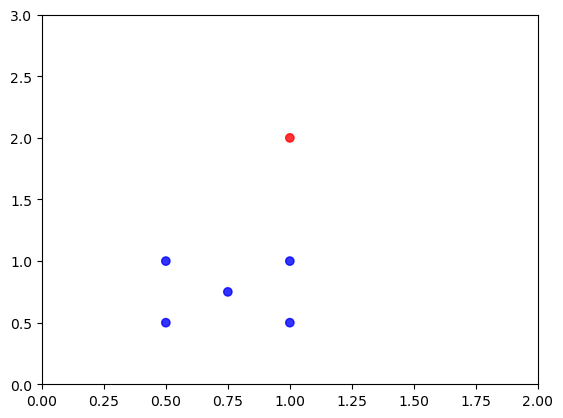

In [4]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])2

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
plt.show()

*******************
Angle based approach. <br> 
I would not use a depth-based aproach as in this case I do not think it would work. It is meant for points on the borders, while here we do not have that type of data. With those set distance-based parameters, the detection of this outlier would not work either, so the only viable choice is an angle based approach. 
******************

## Task 1.3 Theoretical questions (4 points)
<span style='color: green'>**\[Prove\]**</span> 

1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric 
2. Prove that $\hat{\Sigma}=
\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$

1. In order for a measure to be considered a metric, it needs to comply with the following requirements:

    1.1. The distance of a point to itself is 0: with one dimensional input (numbers), subtracting the same number from itself results in 0. When it comes to multi-dimensional inputs, subtraction is defined as pairwise subtractions of numbers along the dimensions, meaning each number ends up being 0, resulting in a 0 distance.
    
    1.2. Non-negativity: the distance between x and y should always be positive or 0. This is trivially true, since an absolute function is applied after the subtraction step.
    
    1.3. Symmetry: the distance from x to y should be the same as y to x. This is true, because although subtraction is not commutative, the result fo x-y and y-x only differs in the sign of the number, which is always changed to positive by the absolute function applied after subtraction.
    
    1.4. Triangle inequality: Based on the definition we get the following inequalities: |𝑥−𝑦| = |𝑥−𝑧+𝑧−𝑦| ≤ |𝑥−𝑧| + |𝑧−𝑦| and also, |𝑧−𝑦| = |𝑧−𝑥+𝑥−𝑦| ≤ |𝑧−𝑥| + |𝑥−𝑦|. Combining the two we get: |𝑥−𝑧| + |𝑧−𝑦| ≤ |𝑥−𝑦| + |𝑥−𝑧| + |𝑦−𝑧|. If we simplify it, we're left with: |𝑥−𝑧| ≤ |𝑥−𝑦| + |𝑦−𝑧|, which is exactly what we were trying to prove: 𝑑(𝑥,𝑦) = |𝑥−𝑦| ≤ |𝑥−𝑧| + |𝑧−𝑦| ≤ |𝑥−𝑦| + |𝑦−𝑧| = 𝑑(𝑥,𝑧) + 𝑑(𝑧,𝑦).

2. We'll prove this equality by reducing both sides of the equation to a form so that they're equal.

For the left hand side: $$
\begin{aligned}
\hat{\Sigma} &= \frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu})\cdot(x_i -\hat{\mu})^\top \\
&= \frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu})(x_i^\top -\hat{\mu}^\top) \\
&= \frac{1}{n}\sum_{i=1}^n x_i x_i^\top - \frac{1}{n}\sum_{i=1}^n x_i \hat{\mu}^\top - \frac{1}{n}\sum_{i=1}^n \hat{\mu} x_i^\top + \frac{1}{n}\sum_{i=1}^n \hat{\mu}\hat{\mu}^\top \\
&= \frac{1}{n}\sum_{i=1}^n x_i x_i^\top - \frac{2}{n}\hat{\mu}\sum_{i=1}^n x_i^\top + \frac{1}{n}n\hat{\mu}\hat{\mu}^\top \\
&= \frac{1}{n}\sum_{i=1}^n x_i x_i^\top - \frac{1}{n}n\hat{\mu}\hat{\mu}^\top + \hat{\mu}\hat{\mu}^\top \\
&= \frac{1}{n}\sum_{i=1}^n x_i x_i^\top - \hat{\mu}\hat{\mu}^\top \\
\end{aligned}
$$

We also know that $E[X] = \hat{\mu}$ and $E[XX^\top] = \frac{1}{n}\sum_{i=1}^n x_i x_i^\top$. Therefore, the right hand side can be reduced the following way: 

$$
\begin{aligned}
E[(X-\hat{\mu})(X-\hat{\mu})^\top] &= E[XX^\top - X\hat{\mu}^\top - \hat{\mu}X^\top + \hat{\mu}\hat{\mu}^\top] \\
&= E[XX^\top] - E[X\hat{\mu}^\top] - E[\hat{\mu}X^\top] + E[\hat{\mu}\hat{\mu}^\top] \\
&= \frac{1}{n}\sum_{i=1}^n x_i x_i^\top - \hat{\mu}\hat{\mu}^\top \\
\end{aligned}
$$

Since we arrived at the same solution both sides of the equality, we have proven that the two expressions really are equal to each other.



# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about red wine variants of the Portuguese "Vinho Verde" wine. It only contains physicochemical and sensory variables, so no prices, grape types and such. Every sample  has also a class of quality which has scores between 1 and 10. It has been used and published with [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016)

In [97]:
toy = wq[wq['quality'].isin([4, 8])]
data_np = toy.to_numpy()
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X = data_np[:,:10]
y = data_np[:,11]
y = y.astype(int) - 1
rows, cols = np.shape(X)
toy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

Correlation matrix check: True
[[1.00 -0.33 0.65 0.03 0.13 0.01 -0.09 0.65 -0.73 0.15 -0.21 0.19]
 [-0.33 1.00 -0.60 -0.18 0.01 -0.06 -0.01 0.03 0.44 -0.30 -0.20 -0.50]
 [0.65 -0.60 1.00 0.16 0.41 0.11 0.10 0.33 -0.70 0.50 0.09 0.43]
 [0.03 -0.18 0.16 1.00 0.02 -0.10 0.18 0.17 -0.08 0.00 0.22 -0.03]
 [0.13 0.01 0.41 0.02 1.00 0.23 0.11 0.31 -0.37 0.67 -0.21 -0.15]
 [0.01 -0.06 0.11 -0.10 0.23 1.00 0.63 -0.07 0.00 0.28 0.01 0.05]
 [-0.09 -0.01 0.10 0.18 0.11 0.63 1.00 -0.01 0.01 0.25 0.00 -0.05]
 [0.65 0.03 0.33 0.17 0.31 -0.07 -0.01 1.00 -0.42 0.14 -0.54 -0.31]
 [-0.73 0.44 -0.70 -0.08 -0.37 0.00 0.01 -0.42 1.00 -0.43 0.27 -0.26]
 [0.15 -0.30 0.50 0.00 0.67 0.28 0.25 0.14 -0.43 1.00 0.10 0.33]
 [-0.21 -0.20 0.09 0.22 -0.21 0.01 0.00 -0.54 0.27 0.10 1.00 0.62]
 [0.19 -0.50 0.43 -0.03 -0.15 0.05 -0.05 -0.31 -0.26 0.33 0.62 1.00]]


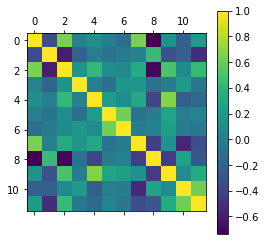

In [459]:
def correlation_matrix(X):
    # create cov matrix
    n, d = X.shape
    mu = np.mean(X, axis=0, keepdims=False)
    cov = (X - mu).T @ (X - mu)/n

    # normalize cov matrix
    corr = []
    for i in range(d):
        corr_row = []
        for j in range(d):
            corr_row.append(cov[i][j] / (cov[i][i] * cov[j][j]) ** 0.5)
        corr.append(corr_row)

    return np.array(corr)

    
X = data_np
Corr = correlation_matrix(X)
plt.matshow(Corr)
plt.colorbar()
print("Correlation matrix check: " + str(np.allclose(Corr, np.corrcoef(X.T))))
with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.2f}'.format}, linewidth=100):
    print(Corr)

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in point A), which pair of different attributes has the highest correlation? <br>

In [460]:
m = (0,1)
for i in range(len(Corr)):
    for j in range(len(Corr[0])):
        if abs(Corr[i][j]) > abs(Corr[m[0]][m[1]]) and Corr[i][j] != 1:
            m = (i,j)
            
print()
print("Pair of attributes with the highest correlation (" + str(Corr[m[0]][m[1]]) + ")"  + ": " + headers[m[0]] + ", " + headers[m[1]])


Pair of attributes with the highest correlation (-0.7348850846057341): fixed acidity, pH


<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two attributs are highly correlated? <br>

That they have a strong relationship with each other, meaning if one attribute has a "higher" value, the other one is likely to have a higher value as well, and vice versa.

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the attributes of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

Yes, since the pH scale is used to determine acidicity and basicity in chemistry, a field called "fixed acidicity" affecting it was to be expected.

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below.
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [X] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

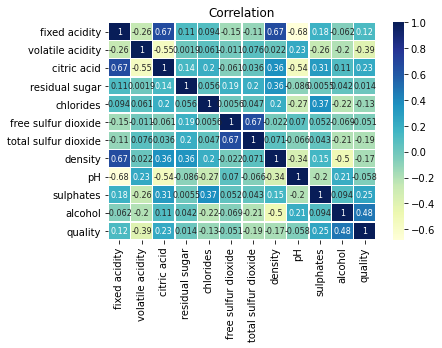

In [461]:
sns.heatmap(wq.corr(),annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Correlation')
plt.show()

Covariance shows the joint variability of two variables. Correlation (at least according to the Pearson's product-moment coefficient) is defined as the normalized covariance, dividing the cov value with the standard deviation product of the two variables to put into a -1..1 scale.

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

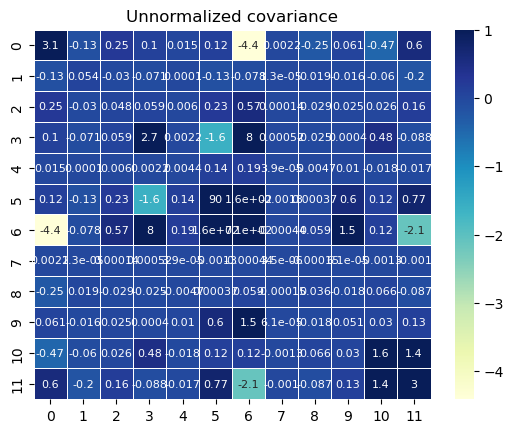

Standard score calculation check: True


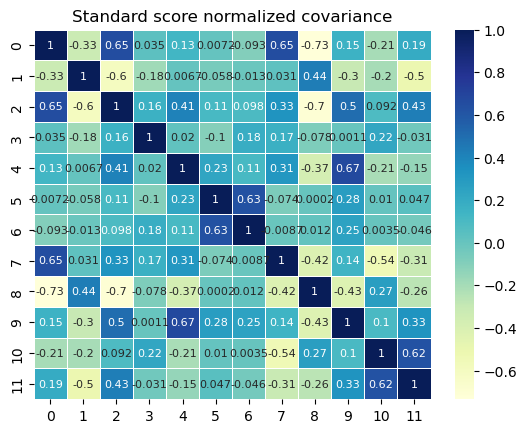

Min-max calculation check: True


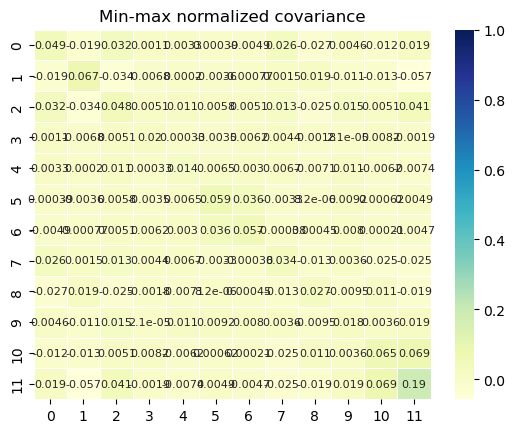

In [664]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Data
X = data_np

def cov(X):
    n, d = X.shape
    mu = np.mean(X, axis=0, keepdims=False)
    return(X - mu).T @ (X - mu)/n

# Unnormalized data
sns.heatmap(cov(X), annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Unnormalized covariance')
plt.show()

# Standard score normalization
std = np.std(X, axis=0, keepdims=False)
mu = np.mean(X, axis=0, keepdims=False)
X_std = (X - mu) / std
cov_std = cov(X_std)
print("Standard score calculation check: " + str(np.allclose(X_std, zscore(X))))

sns.heatmap(cov_std, annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Standard score normalized covariance')
plt.show()

# Min-max normalized features
X_mm = (X - np.amin(X, axis=0, keepdims=False)) / (np.amax(X, axis=0, keepdims=False) - np.amin(X, axis=0, keepdims=False))
cov_mm = cov(X_mm)

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print("Min-max calculation check: " + str(np.allclose(X_mm, X_scaled)))

sns.heatmap(cov_mm, annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Min-max normalized covariance')
plt.show()

### Task 2.1.4 (3 points)
<span style='color: green'>**\[Describe\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable.
- [X] Standard score normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other.
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

1. Incorrect. Range normalization does not preserve variance because the ranges of different features can be significantly different, so a meaningful, direct comparison cannot be made.
2. Correct. Standard score normalization first centers the data around its mean value, then divides using standard deviation, which is a metric that already describes the variabiliity of data, effectively preserving the proportions of variance and making direct comparisons viable.
3. Incorrect, based on the descriptions above - just because both techniques normalize the data objects to a certain range, does not mean the values are comparable.
4. Incorrect, as described above, standard score normalization achieves this effect.

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>IMPORTANT: You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [463]:
from scipy.stats import norm
    
def histogram(x, b, bucket_width, min_val):
    res = np.zeros(b)
    for x_i in x:
        bucket = int((x_i - min_val) // bucket_width)
        if bucket >= 0 and bucket < b:
            res[bucket] += 1
    return np.array(res)

X = data_np
def norm_dist(x, b): 
    mean = np.mean(x)
    var = np.var(x, ddof=1)
    gauss_dist = norm.rvs(loc=mean, scale=(var ** 0.5), size=len(x))
    
    # get absolute min and max to determine bucket width
    min_val = min(min(x), min(gauss_dist))
    max_val = max(max(x), max(gauss_dist))
    bucket_width = (max_val - min_val) / b
    
    gauss_histogram = histogram(gauss_dist, b, bucket_width, min_val)
    x_histogram = histogram(x, b, bucket_width, min_val)
    
    return np.sum(np.abs(gauss_histogram - x_histogram))


### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

The most glaring drawback of the norm_dist function is that it assumes the input has a normal distribution - and if it doesn't, the difference calculated might not be very meaningful.
Also, after some experimentation, we found that bucket size affects the result quite a bit, so it has to be chosen properly.
Obviously, as with any similar distribution based metrics, a small sample size might lead to inaccurate representation of the data.

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

No, because the normal distribution relies on the mean and variance of the sample, which are heavily affected by outliers.

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [464]:
b = 10
for i, col in enumerate(X.T):
    print(headers[i] + ": " + str(norm_dist(col, b)))

fixed acidity: 30.0
volatile acidity: 30.0
citric acid: 54.0
residual sugar: 75.0
chlorides: 63.0
free sulfur dioxide: 33.0
total sulfur dioxide: 38.0
density: 15.0
pH: 17.0
sulphates: 47.0
alcohol: 30.0
quality: 97.0


<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

Quality, which has almost twice as much of a distance as the next nearest one.

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the attribute features follow a normal distribution?

The function above tells us the distance of the attributes to a normal distribution, determining which one is actually following a normal distribution requires us determining a threshold of distance from the true normal distribution that's still acceptable. Looking at the results above, the lowest values are density and pH, which are sufficiently low to be called normal distribution.

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Describe\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

In [78]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape

fig = plt.figure(constrained_layout=True, figsize=(8, 30))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(3,n): 
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

<Figure size 432x288 with 0 Axes>

<Figure size 576x2160 with 0 Axes>

When it comes to the sum of absolute differences of histograms as implemented in Task 2.2.1, outlier data can massively influence the means and deviations used to calculate the gaussian distribution. However, Q-Q plots are based on the rank-order of the data, which is less sensitive. Rank-ordering the data means to assign a number to each data value (such as 1 for the smallest value, 2 for the second smallest etc.), converting the original data in a way that it's uniformly distributed between 0 and 1. This obviously results in outliers being less significant, since all further quantile calculations are based on this rank data.
Also, it has to be mentioned that while the method in Task 2.2.1 assumes the sample follows a normal distribution, Q-Q plots can be used for data following any distribution.

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and use the elbow method plotting the **silhouette coefficient** to detect the number of clusters $k$. 

Use the "sulphates" and "alcohol" features of the data set. Your final plot should look like the figure below:

![SNOWFALL](images/elbow.png)

In [88]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def calc_score(x, label, l, k):
    cluster_i = []
    for ind, j in enumerate(l):
        if j == label:
            cluster_i.append(ind)
            
    int_dist = np.mean([euclidean_distance(x, X[i]) for i in cluster_i if not np.allclose(X[i], x)])
    if np.isnan(int_dist):
        int_dist = 0
        
    cluster_avgs = []
    for i in range(k):
        if i != label:
            cluster_i = []
            for ind, j in enumerate(l):
                if j == i:
                    cluster_i.append(ind)
            c_dist = np.mean([euclidean_distance(x, X[i]) for i in cluster_i])
            cluster_avgs.append(c_dist)
    ext_dist = min(cluster_avgs)

    score = (ext_dist - int_dist) / max(ext_dist, int_dist)
    return score

def silhouette(X):
    scores = []
    clusters_to_check = range(2, 10)
    for k in clusters_to_check:
        kmeans = KMeans(n_clusters=k, random_state=10, n_init="auto").fit(X)
        l = kmeans.labels_
        avg_score = np.mean([calc_score(x, label, l, k) for x, label in zip(X, l)])
        scores.append(avg_score)

    
    plt.plot(clusters_to_check, scores)
        

silhouette(X)


### YOUR CODE HERE

TypeError: '<=' not supported between instances of 'str' and 'int'

B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

The silhouette coefficient is a value in the range -1..1, where the higher the value is, the stronger structure the clusters have. This means that based on the highest point of the chart plotted above, k=3 clusters is the optimum result.

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>IMPORTANT: You can use the KMeans implementation from scikit-learn.</font> <br>

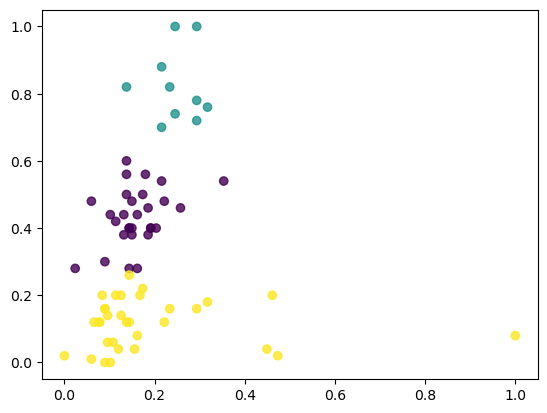

In [666]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

kmeans = KMeans(n_clusters=3).fit(X_norm)
clusters = kmeans.labels_

plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span><br> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 


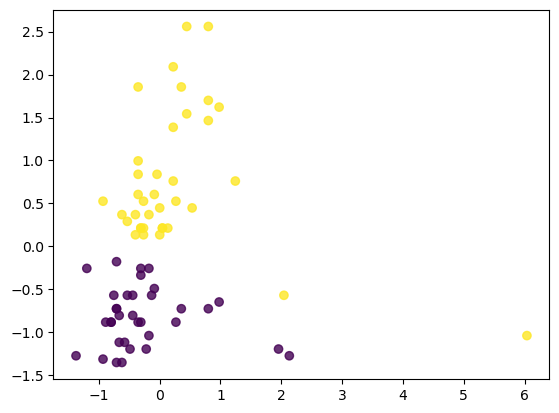

In [673]:
### YOUR CODE HERE
X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.8):
    return np.exp(-np.sum((x - y) ** 2) / (2 * (sigma ** 2)))

def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=.01):
    n_samples = X.shape[0]
    
    rand_indices = np.random.choice(n_samples, n_clusters)
    centers = X[rand_indices]
    
    kernel_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i, n_samples):
            kernel_matrix[i, j] = kernel(X[i], X[j])
            kernel_matrix[j, i] = kernel_matrix[i, j]
    
    for _ in range(iters):
        distances = np.zeros((n_samples, n_clusters))
        for j in range(n_clusters):
            for i in range(n_samples):
                distances[i, j] = kernel(X[i], centers[j])
        
        labels = np.argmin(distances, axis=1)
        
        for j in range(n_clusters):
            mask = labels == j
            if np.sum(mask) == 0:
                new_center_index = np.random.choice(n_samples)
                centers[j] = X[new_center_index]
            else:
                centers[j] = np.sum(kernel_matrix[mask][:, mask] @ X[mask], axis=0) / np.sum(kernel_matrix[mask][:, mask])
        
        if np.max(distances[np.arange(n_samples), labels]) < error:
            break
    
    return labels

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
clusters = kernel_kmeans(X_scaled, 2)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)


## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

The **Conditional Entropy** of $C$ **given** $T$ is given by: 
$$\text{CE}(C|T)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

In [7]:
import math

In [8]:
def entropy(C):
    # Let C be a list of clusters
    cluster_prob = [C.count(cluster)/len(C) for cluster in set(C)]
    entropy = -sum([p*math.log2(p) for p in cluster_prob])
    return entropy

def CE(C1, C2):
    #CE(C1|C2)
    ce = 0
    
    C1_unique = set(C1)
    C2_unique = set(C2)
    
    n = len(C1)
    count_unique_C1 = len(C1_unique)
    count_unique_C2 = len(C2_unique)
    
    for i,cluster1 in enumerate(C1_unique):
        for j, cluster2 in enumerate(C2_unique):
            nij = np.sum((C1 == cluster1) & (C2 == cluster2))
            if nij > 0:
                nj = sum(C2 == cluster2)
                ce -= (nij/n) * math.log2((nij/nj))
    return ce

X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Print the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. 
Make sure that the number of clusters and the number of class labels is the same.<br>

In [10]:
class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels]
assert len(class_labels) == len(X_norm)
print("The conditional entropy is", CE(np.array(class_labels), KMeans(n_clusters=2).fit(X_norm).labels_))

The conditional entropy is 0.6472936096768649


<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
The measure is influenced by the size of the clusters in the sense that some will still appear more than others, but it takes all of them into account, meaning that it takes cluster size less into account than some other measures. 
******************

<span style='color: green'>**\[Describe\]**</span><br>
B) What does the measure capture? 

*******************
The measure of entropy is in general meant to measure the amount of bits needed to convey some information, showing us the uncertainty. If a variable is known to always posses some value, there is no uncertainty and entropy = 0, while if all the values are as likely, then entropy is at its highest. 
Conditional entropy represents the entropy of $X$ given $Y$. It is the uncertainty of $X$ that is still left over after we know $Y$. Because of this, the conditional entropy is 0 if they are completely dependent, and it is at its highest if they are completely independent, according to the formula $H(X|Y) = H(X,Y) - H(Y)$
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [11]:
## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = []
    #set of unique clusters for each
    C_unique = set(C)
    T_unique = set(T)
    
    count_points = len(C)
    count_unique_C = len(C_unique)
    count_unique_T = len(T_unique)
    
    true_points = np.zeros((count_unique_C, count_unique_T))
    for i,cluster1 in enumerate(C_unique):
        for j, cluster2 in enumerate(T_unique):
            true_points[i, j] = np.sum((C == cluster1) & (T == cluster2))
        purity.append(max(true_points[i]))
    purity = np.sum(purity)/count_points
    return purity

### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Print the purity of the clusters obtained by k-means in Task 3.1.1. 

In [12]:
C = KMeans(n_clusters=2).fit(X_norm).labels_
T = np.array(class_labels)
assert len(T) == len(C)
print('Purity: {}, CE: {}'.format(purity(T,C), CE(T,C)))

Purity: 0.704225352112676, CE: 0.6472936096768649


B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [x] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
As is apparent from the formula for purity, it only chooses the ground truth cluster corresponding to the highest number of matching assignments, ignoring the rest. This is not favorable when it comes to throughout analysis, although it might be useful for other purposes. Conditional entropy does not struggle with this, taking into account all clusters and points. 
******************

### Task 3.3 OPTICS

### Task 3.3.1 (7 point)
<span style='color: green'>**\[Implement\]**</span> the OPTICS algorithm

If you do not remember [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm), check the slides or the lecture notes. 

In [560]:
INVALID_DIST = 0.4

class OpticPoint:
    def __init__(self, index, rdist, cdist=0):
        self.index = index
        self.rdist = rdist
        self.cdist = cdist
    def __repr__(self):
        return f"(index={self.index}, rdist={self.rdist}, cdist={self.cdist})"

class PriorityList:
    def __init__(self):
        self.control_list = []
    
    def insert(self, index, rdist=INVALID_DIST):
        new_point = OpticPoint(index, rdist)
        
        insert_index = -1
        for i, p in enumerate(self.control_list):
            if new_point.rdist <= p.rdist:
                insert_index = i - 1
        if insert_index == -1:
            self.control_list.append(new_point)
        else:
            self.control_list.insert(insert_index, new_point)
    
    def next(self):
        return self.control_list.pop(0)
    
    def remove(self, index):
        return self.control_list.pop(index)
    
    def update(self, index, new_rdist):
        filtered = [i for i, p in enumerate(self.control_list) if p.index == index]
        if len(filtered) != 1:
            return
        
        old_index = filtered[0]
        old_point = self.control_list[old_index]
        if new_rdist < old_point.rdist:
            self.remove(old_index)
            self.insert(index, new_rdist)
            
    def __getitem__(self, i):
        return self.control_list[i]
    
    def is_empty(self):
        return len(self.control_list) == 0
    
    def contains(self, index):
        filtered = [i for i, p in enumerate(self.control_list) if p.index == index]
        return len(filtered) == 1
        

def region_query(X, point, eps):
    neighbors = []
    for i, x in enumerate(X):
        dist = euclidean_distance(point, x)
        if dist <= eps:
            neighbors.append(i)
    return neighbors

def cdist(X, index, N, min_samples):
    if len(N) < min_samples:
        return INVALID_DIST
    
    dists = [euclidean_distance(X[index], X[j]) for j in N]
    return dists[min_samples-1]

def rdist(cdist, x, y):
    return max(cdist, euclidean_distance(x, y))

def optics(X, eps, min_samples):
    processed = [False for _ in range(len(X))]
    control_list = PriorityList()
    ordering = []

    for i in range(len(X)):
        if not processed[i]:
            control_list.insert(i)
        while not control_list.is_empty():
            p = control_list.next()
            N = region_query(X, X[p.index], eps)
            p.cdist = cdist(X, p.index, N, min_samples)

            processed[p.index] = True
            ordering.append(OpticPoint(p.index, p.rdist, p.cdist))
            
            if p.cdist <= eps:
                for n in N:
                    if not processed[n]:
                        new_rdist = rdist(p.cdist, X[p.index], X[n])
                        if not control_list.contains(n):
                            control_list.insert(n, new_rdist)
                        else:
                            control_list.update(n, new_rdist)
                            
    clusters = [0 for _ in range(len(X))]
    current_label = 0
    for p in ordering:
        # inside a valley
        if p.rdist < eps:
            clusters[p.index] = current_label
        else:
            # at a peak, aka noise
            if p.cdist > eps:
                clusters[p.index] = -1
            # beginning of a valley, start a new cluster
            else:
                current_label += 1
                clusters[p.index] = current_label
            
    return clusters, ordering

### Task 3.3.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run OPTICS with parameters $\varepsilon=0.07, minPts=3$. <br> 

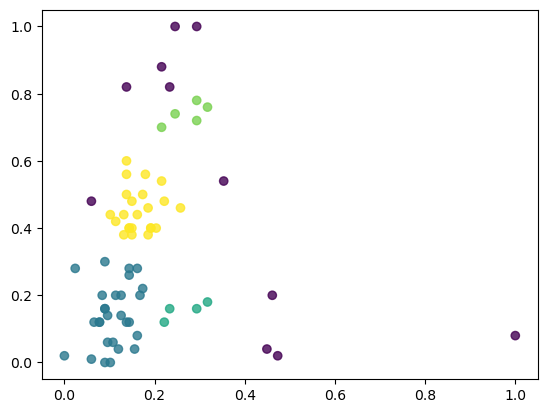

In [674]:
X_norm = (X - X.min(0)) / X.ptp(0)

clusters, ordering = optics(X_norm, 0.07, 3)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

<BarContainer object of 71 artists>

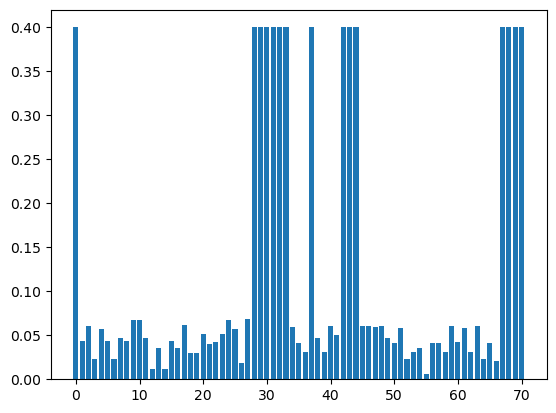

In [562]:
# Reachability plot
plt.bar([i for i in range(len(ordering))], [o.rdist for o in ordering])

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare the results of OPTICS with those of k-means. Which of the two methods two achieve a better **CE**? 

In [661]:
class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels]
labels, _ = optics(X_norm, 0.07, 3)
print("The conditional entropy is", CE(np.array(class_labels), np.array(labels)))

The conditional entropy is 0.4679538944762204


OPTICS does a better job of identifiying clusters, especially those with varying densities, and thus achieves a lower (better) conditional entropy.

### Task 3.3.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple subspace clustering algorithm.
1. Take all subsets of 2,3 attributes. Beware that you should only use the numerical attributes.
2. Run OPTICS on each subset. 
3. Compute **CE** for each subset. 
4. Keep the k subsets with the largest **CE**. 
    
<font color='red'>IMPORTANT: You may have to experiment a lot with eps and MinPts to get reasonable clusters. You are allowed to use **itertools** library to iterate over all subsets of size 2 and 3.</font>

In [662]:
import itertools
# Necessary Data normalization!
X_pt = toy.to_numpy()
X_norm_pt = (X_pt - X_pt.min(0)) / X_pt.ptp(0)

def get_permutations(cols, r):
    perms = itertools.permutations(range(cols), r)
    sorted_perms = [tuple(sorted(p)) for p in perms]
    return list(set(sorted_perms))


cols = X_norm_pt.shape[1] - 1 # remove the quality column
perms_2 = get_permutations(cols, 2)
perms_3 = get_permutations(cols, 3)
perms = perms_2 + perms_3

class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels]

results = []

for p in perms:
    X_curr = []
    for i in p:
        X_curr.append(X_norm_pt.T[i])
    X_curr = np.array(X_curr).T
    labels, _ = optics(X_curr, 0.1, 2)
    ce = CE(np.array(class_labels), np.array(labels))
    if ce > 0.0:
        results.append((ce, p))

optics_ces = sorted(results, key=lambda r: r[0])

In [663]:
k = 10
for i in range(k):
    ce, p = optics_ces[i]
    cols = []
    for j in p:
        cols.append(toy.columns[j])
    print(f"{i+1}. {', '.join(cols)}: {ce}")

1. citric acid, alcohol: 0.23716303467741273
2. pH, sulphates, alcohol: 0.2670076519475346
3. citric acid, chlorides, alcohol: 0.2776960002911815
4. citric acid, sulphates, alcohol: 0.29081615319370235
5. total sulfur dioxide, pH, sulphates: 0.3340374784426505
6. volatile acidity, chlorides, alcohol: 0.3372812994193408
7. citric acid, free sulfur dioxide, sulphates: 0.34096015125100654
8. citric acid, residual sugar, alcohol: 0.34725383143737454
9. fixed acidity, pH, alcohol: 0.364501913753004
10. free sulfur dioxide, pH, alcohol: 0.3913673464898632


# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [98]:
X_small = toy[["sulphates", "alcohol"]].to_numpy()

X_norm = (X_small - X_small.min(0)) / X_small.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [61]:
from collections import defaultdict

In [62]:
def distance(x,y):
    return ((x[1]-y[1])**2 + (x[0]-y[0])**2)**0.5

def DBOutliers(X, eps, pi): 
    outliers = []
    length = len(X)-1
    for x in X:
        neighbours = []
        for neighbour in X:
            if np.array_equal(x, neighbour):
                continue
            if distance(x, neighbour) <= eps:
                neighbours.append(neighbour)
        if len(neighbours)/length <= pi:
            outliers.append(list(x))
    return outliers

### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [63]:
def plotDBOutliers(X_pass, outliers):
    plt.plot(X_pass[:,0], X_pass[:,1], 'o', color='black')
    outliers_0 = [outlier[0] for outlier in outliers]
    outliers_1 = [outlier[1] for outlier in outliers]
    plt.plot(outliers_0,outliers_1,  'o', color='blue')
    plt.show()

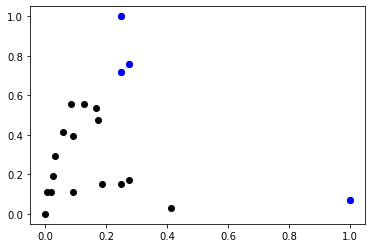

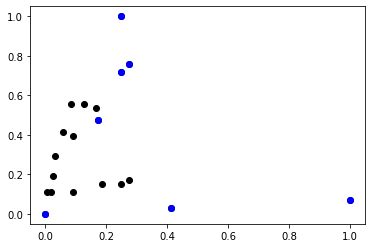

In [64]:
outliers_1 = DBOutliers(X_norm, 0.5,0.5)
plotDBOutliers(X_norm, outliers_1)

outliers_2 = DBOutliers(X_norm, 0.3,0.4)
plotDBOutliers(X_norm, outliers_2)

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
The results show us how differently the points can be recognized as outliers dependent on $\epsilon$ and $\pi$. We can see on the first graph that even though $\epsilon$ is fairly large, 4 points are still classified as outliers due to the high $\pi$. The points classified as outliers are ones in the least densely populated regions, and ones that definitely seem more like outliers than some of the points on the second graph, where both $\epsilon$ and $\pi$ are smaller. Here, some points that might not be outliers are classified as such due to the technique not taking into account the shape of the clustering, but only the two parameters, which probably have not been tuned best here, primarily $\pi$
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

In [188]:
def sum_pairwise(X_pair):
    sum = 0
    for x1 in X_pair:
        for x2 in X_pair:
            sum += distance(x1,x2)
    return sum/2

def tune_dboutliers(X): 
    best_eps = None
    best_pi = None
    best_score = 100000
    eps = np.arange(0.05, 1, 0.05)
    pi_vals = np.arange(0.05, 1, 0.05)
    for epsilon in eps:
        for pivalue in pi_vals:
            outliers = DBOutliers(X, epsilon,pivalue)
            X_wo_outlier = X
            for outlier in outliers:
                np.delete(X_wo_outlier, outlier)
            distances_no = sum_pairwise(X_wo_outlier)
            distances_o = sum_pairwise(outliers)
            sum_outl = len(outliers)*len(X_wo_outlier)
            if sum_outl == 0:
                if len(outliers) == 0:
                    sum_outl = len(X_wo_outlier)
                else:
                    sum_outl = len(outliers)
            score = math.sqrt((distances_o-(distances_no-distances_o))**2)/sum_outl
            if score < best_score:
                print("score ", score, "eps ", epsilon, "pi ", pivalue)
                best_score = score
                best_eps = epsilon
                best_pi = pivalue
    return best_eps, best_pi

score  0.007644461902249043 eps  0.05 pi  0.05
score  0.003002026943984346 eps  0.55 pi  0.9000000000000001
0.55
0.9000000000000001


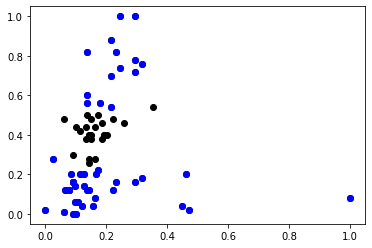

In [189]:
best_eps, best_pi = tune_dboutliers(X_norm)
print(best_eps)
print(best_pi)
outliers_tuned = DBOutliers(X_norm, best_eps,best_pi)
plotDBOutliers(X_norm, outliers_tuned)

B) <span style='color: green'>**\[Describe\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
My main idea is to try to maximize the difference between the outliers pairwise distance and the non-outliers pairwise distance after calculating the outliers. These are normalized and then divided by the length of them when multiplied. So, we iterate through each pair of epsilon and pi, running DBOutliers and getting the outliers. It's strength is that it seems to correctly identify the densest region of the dataset, within a wide radius, while its weakness is that it seems to misdetect a big chunk of what are probably outliers. 
******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Describe\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

I was not sure which solution implemented in the TAs to include, so I included the actual implementation instead of the sklearn use. I hope that is okay. I used the bigger dataset because the differences seem to be more apparent.  

In [100]:
X = X_norm.copy()

1.5909644596811947
2.493979317654288
1.6758295154796554
1.9102969075416691
2.0184387596668043
1.3628964450274128
2.6695525975226353
1.9793227731864023
1.852035320031623
1.7799999999999963


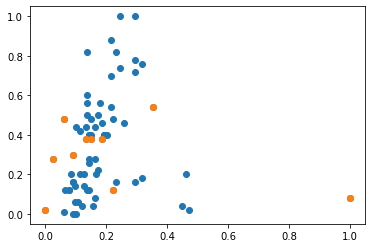

In [106]:
#IMPELEMNTATION FROM TA WEEK 9
k  = 3

neighborhoods  = []
kdists         = []

# Find neighbors and kdists
for i, x in enumerate(X):
    n = np.arange(X.shape[0])
    d = np.zeros_like(n, dtype=float)
    for j, x_ in enumerate(X):
        if i == j: continue # skip i it self
        d[j] = np.linalg.norm((x-x_), ord=1)
    args = np.argsort(d)
    ns = n[args]
    ds = d[args]

    kdist =  ds[k-1]
    #print(f'd:{d}\nns:{ns}\nds: {ds}\nkdist:{kdist}')
    kdists.append(kdist)
    neighborhoods.append(ns[ds <= kdist])

# Compute lrds
reach_dist = lambda i, j: max(kdists[j], np.linalg.norm(X[i]-X[j], ord=1))
lrds = []
for i, x in enumerate(X):
    lrd = 0
    for j in neighborhoods[i]:
        lrd += reach_dist(i, j)
    lrd /= len(neighborhoods[i])-1
    lrd = 1 / lrd
    lrds.append(lrd)

def LOF(i):
    lof = np.sum([lrds[j] for j in neighborhoods[i]])/len(neighborhoods[i])
    return lof / lrds[i]

lofs = [LOF(i)> 1.30 for i in range(len(X))]

plt.scatter(X[:,0],X[:,1])
plt.scatter(X[lofs,0],X[lofs,1])

for i in range(len(lofs)):
    if lofs[i]: print(LOF(i))

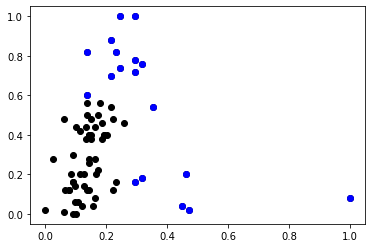

In [146]:
outliers_LOF_DB = DBOutliers(X_norm, 0.18,0.2)
plotDBOutliers(X_norm, outliers_LOF_DB)

*******************
As seen in the graphs, DBOutliers finds a much larger quantity of outliers. In its case, these outliers are any points that do not fit into the epsilon distance within the pi percentage of the point. LOF works in a bit of a different way, as it always takes into account the same amount of points, kneighbours, then comparing the local densities between the different neighbours in order to assign a score to a point. Because of this, we can see some outliers where we might not expect them usually, like in the denser regions. These points, although parts of a dense region, do not fit in as well with their neighbours. DBOutliers would not classifly these points as outliers as it only checks the epsilon and the pi, kind of working more at a global context than a local one.
******************